In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
99402,99402,165024,165025,Related to technology the problems that are no...,Related to technology what are the problems th...,1
232637,232637,342693,342694,What is your review of Gurgaon Professionals?,What is your review of Gurgaon?,0
139341,139341,38561,106674,What does a hard disk drive do in a computer?,What is the function of the hard disc drive in...,1
309588,309588,156580,433589,What is NATO?,Is NATO still boycotting Russia?,0
43271,43271,77857,77858,What was Bridget Riley's intent by making the ...,How do we get our SaaS platform on the vendor ...,0
318083,318083,46881,443377,Is android better than iOS in 2016?,Which is better Android or iOS?,1
114655,114655,187114,164454,Is there a free DDNS supplier that uses TSIG w...,How can I install a Mac software on a PC?,0
142408,142408,33700,194816,What is means love?,What's true love?,1
62887,62887,109517,108356,How do I score good marks in board Exams (clas...,How can I score good marks in class 12th board...,1
58610,58610,102797,102798,How do I earn one million rupees in 6 months a...,How much is 3000 million of an entity equal to...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

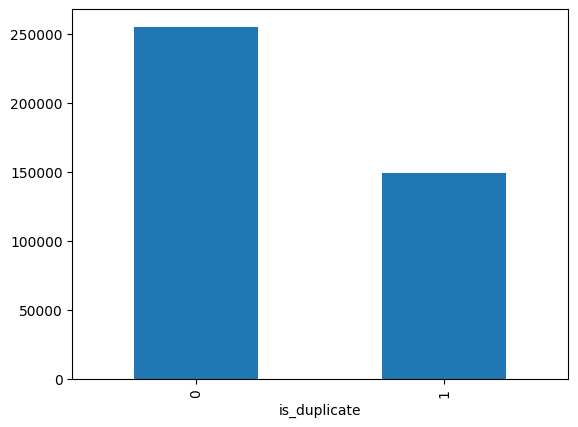

In [8]:
#distribution b/w duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated Quetions
qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [10]:
np.unique(qid).shape[0]

537933

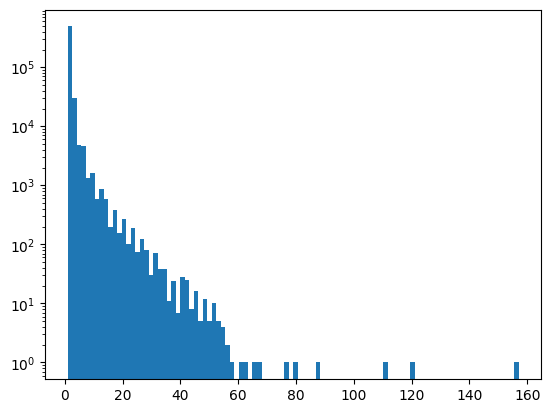

In [11]:
# repeated questions histogram
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()